In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [41]:
data = pd.read_csv("datasets/bike_share.csv")

In [42]:
data.columns

Index(['Unnamed: 0', 'datetime', 'season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [43]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [44]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


In [45]:
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [46]:
data.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


In [47]:
cols_to_drop = ["atemp", "casual", "registered"]
data = data.drop(cols_to_drop, axis=1)

In [48]:
data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,81,0.0,16
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,80,0.0,40
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,80,0.0,32
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,75,0.0,13
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,75,0.0,1


In [49]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']

for col in cat_cols:
    data[col] = pd.Categorical(data[col])

In [50]:
data["datetime"] = pd.DatetimeIndex(data["datetime"])

In [30]:
# data.profile_report()

In [51]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

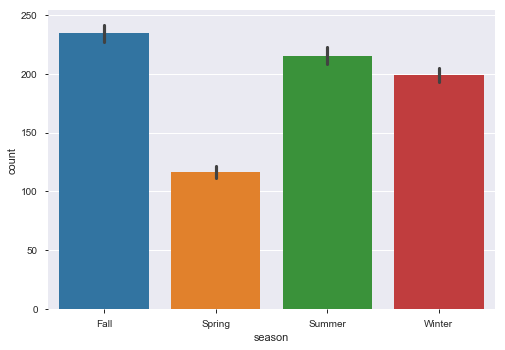

In [54]:
sns.barplot('season', 'count', data=data)
plt.show()

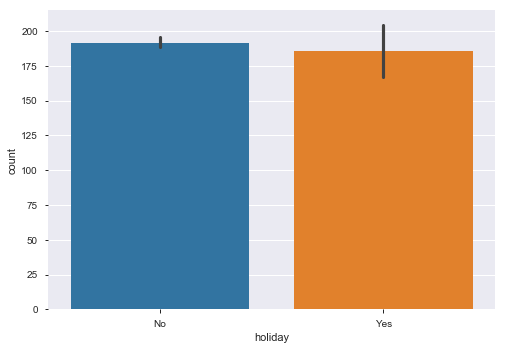

In [57]:
sns.barplot('holiday', 'count', data=data)
plt.show()

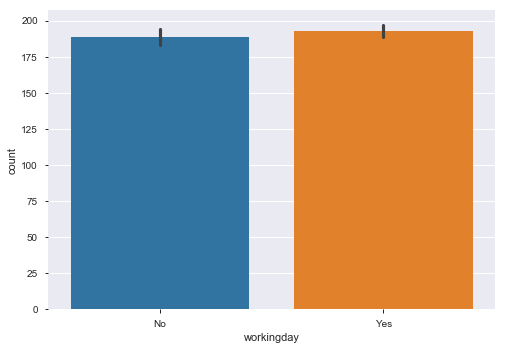

In [58]:
sns.barplot('workingday', 'count', data=data)
plt.show()

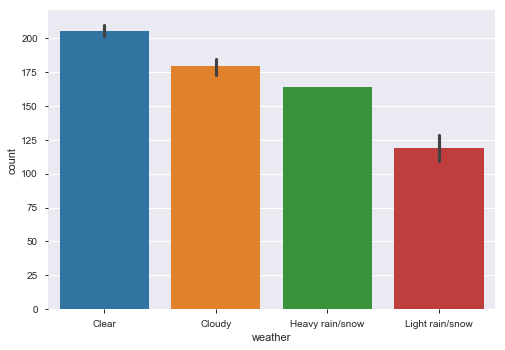

In [59]:
sns.barplot('weather', 'count', data=data)
plt.show()

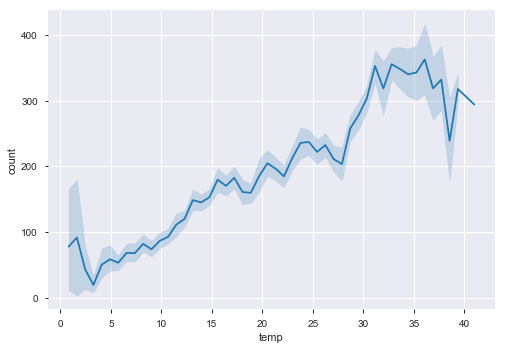

In [60]:
sns.lineplot('temp', 'count', data=data)
plt.show()

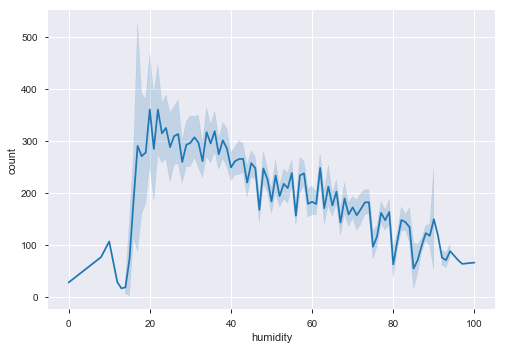

In [61]:
sns.lineplot('humidity', 'count', data=data)
plt.show()

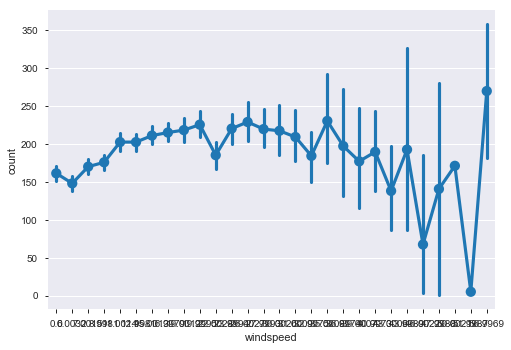

In [63]:
sns.pointplot('windspeed', 'count', data=data)
plt.show()

In [73]:
data["datetime"][0]

0

In [75]:
hour = []
for datetime in data["datetime"]:
    hour.append(datetime.hour)

In [76]:
data["hour"] = hour

In [83]:
data["hour"] = data["datetime"].apply(lambda x: x.hour)

In [84]:
data.drop("datetime", axis=1, inplace=True)

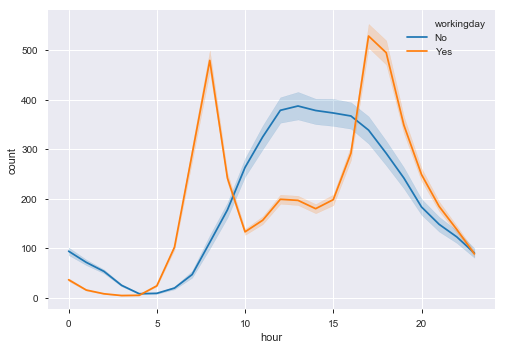

In [87]:
sns.lineplot("hour", "count", hue="workingday", data=data)
plt.show()

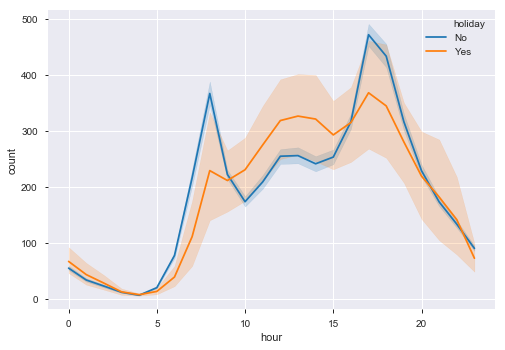

In [88]:
sns.lineplot("hour", "count", hue="holiday", data=data)
plt.show()

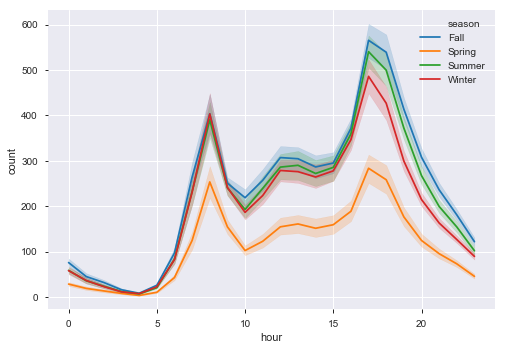

In [89]:
sns.lineplot("hour", "count", hue="season", data=data)
plt.show()

In [90]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'hour'],
      dtype='object')

In [93]:
data["holiday"] = data["holiday"].map({"Yes":1, "No":0})

In [94]:
data["workingday"] = data["workingday"].map({"Yes":1, "No":0})

In [96]:
data = pd.get_dummies(data)

In [98]:
data.head()

,holiday,workingday,temp,humidity,windspeed,count,hour,season_Fall,season_Spring,season_Summer,season_Winter,weather_Clear,weather_Cloudy,weather_Heavy rain/snow,weather_Light rain/snow
0,0,0,9.84,81,0.0,16,0,0,1,0,0,1,0,0,0
1,0,0,9.02,80,0.0,40,1,0,1,0,0,1,0,0,0
2,0,0,9.02,80,0.0,32,2,0,1,0,0,1,0,0,0
3,0,0,9.84,75,0.0,13,3,0,1,0,0,1,0,0,0
4,0,0,9.84,75,0.0,1,4,0,1,0,0,1,0,0,0


In [100]:
data.describe()

,holiday,workingday,temp,humidity,windspeed,count,hour,season_Fall,season_Spring,season_Summer,season_Winter,weather_Clear,weather_Cloudy,weather_Heavy rain/snow,weather_Light rain/snow
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,61.886460,12.799395,191.574132,11.541613,0.251056,0.246739,0.251056,0.251148,0.660665,0.260334,0.000092,0.078909
std,0.166599,0.466159,7.79159,19.245033,8.164537,181.144454,6.915838,0.433641,0.431133,0.433641,0.433694,0.473505,0.438837,0.009584,0.269609
min,0.000000,0.000000,0.82000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,47.000000,7.001500,42.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.50000,62.000000,12.998000,145.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.24000,77.000000,16.997900,284.000000,18.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,41.00000,100.000000,56.996900,977.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
scaler= MinMaxScaler(feature_range=(0,1))

In [102]:
cols = ['temp', 'windspeed', 'humidity']

In [103]:
data[cols] = scaler.fit_transform(data[cols])

In [104]:
data.head()

,holiday,workingday,temp,humidity,windspeed,count,hour,season_Fall,season_Spring,season_Summer,season_Winter,weather_Clear,weather_Cloudy,weather_Heavy rain/snow,weather_Light rain/snow
0,0,0,0.224490,0.81,0.0,16,0,0,1,0,0,1,0,0,0
1,0,0,0.204082,0.80,0.0,40,1,0,1,0,0,1,0,0,0
2,0,0,0.204082,0.80,0.0,32,2,0,1,0,0,1,0,0,0
3,0,0,0.224490,0.75,0.0,13,3,0,1,0,0,1,0,0,0
4,0,0,0.224490,0.75,0.0,1,4,0,1,0,0,1,0,0,0
